<a href="https://colab.research.google.com/github/virtualspark/YCNG232-NLP_Fundamentals/blob/main/Reflexion_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gutenbergpy # https://github.com/raduangelescu/gutenbergpy to get access to full texts of books

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29269 sha256=b5f37f2e6e08de36d857dbac6b8bfae00b009f1c612dbd057e9064b2cac9b096
  Stored in directory: /root/.cache/pip/wheels/91/04/37/b7080e0cfe33a8bc79ff0082159cea767f9145a5a713b501a3
Successfully built httpsproxy-urllib2


In [166]:
target = 47360 # Title: Le second rang du collier, by Judith Gautier
import gutenbergpy.textget
raw  = gutenbergpy.textget.get_text_by_id(target) # access the content
text = gutenbergpy.textget.strip_headers(raw) # remove header metadata
count = 100 # how many characters we wish to see
print(text[:count]) 
print(text[-count:])

b'http://www.freeliterature.org (Images generously made\navailable by The Bodleian Libraryin Oxford)\n\n\n'
b'R\xc3\x89GOIRE XVI (1831-1846) qui faisait ses d\xc3\xa9lices de Paul de Kock, dont\nil italianisait le nom.\n\n\n\n\n'


In [167]:
s = text.decode("utf-8") # get a string from the byte sequence
marker = '1909'
startPosition = s.index(marker) + len(marker)
content = s[startPosition:]
print(content[:count]) # beginning
print(content[-count:]) # end






I


--Je suis sûr, Théo, que mam'zelle Huai, enseigne à vos filles le plus
pur accent marseilla

GRÉGOIRE XVI (1831-1846) qui faisait ses délices de Paul de Kock, dont
il italianisait le nom.







In [168]:
# Step 1: Count estimate of number of sentences

In [169]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [170]:
number_of_sentences = sent_tokenize(content)
print(len(number_of_sentences))

3179


In [171]:
# Step 2: Count estimate of number of paragraphs

In [203]:
lines = content.strip().splitlines() # to remove empty lines at the beginning and end   
emptylines = [e for e in lines if e.strip() == ''] # find empty lines (line between paragraph and another)
len(emptylines)

1685

In [174]:
# Step 3: Remove punctuations

In [175]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(content)
words_join_no_punctuations = ' '.join(words)
print(words_join_no_punctuations)

I Je suis sûr Théo que mam zelle Huai enseigne à vos filles le plus pur accent marseillais et qu elles prononcent _des oiegnons _ C est Paul de Saint Victor qui taquine ainsi mon père à propos de notre institutrice Mlle Honorine Huet qu il prononce Huai méchamment sans faire sonner le T pour imiter le parler du midi car il a une antipathie marquée pour la grave personne qui nous dirige Quand il vient à la maison il ne manque jamais de lui décocher du haut de son raide faux col quelque piquante malice qu Honorine accueille par un rire gras qui sonne faux et des minauderies pincées Toujours aussi le grand critique s arrêtait comme s il le voyait pour la première fois devant _Le règlement_ que Mlle Huet avait placardé sur une porte et qui disciplinait chaque heure de notre journée Il affectait une grande surprise relisait chaque article avec une attention narquoise et des commentaires ironiques Une fois il nous avait rencontrées quelques jours auparavant à une matinée du Théâtre Français 

In [176]:
# Step 4: Find all words in the book while removing stopwords

In [177]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
skip = stopwords.words('french')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [178]:
words = word_tokenize(words_join_no_punctuations)
wordsFiltered = []

for w in words:
    if w not in skip and len(w) > 3:
        wordsFiltered.append(w)

words_join_no_stopwords = ' '.join(wordsFiltered)
print(words_join_no_stopwords)

Théo zelle Huai enseigne filles plus accent marseillais elles prononcent _des oiegnons Paul Saint Victor taquine ainsi père propos institutrice Mlle Honorine Huet prononce Huai méchamment sans faire sonner imiter parler midi antipathie marquée grave personne dirige Quand vient maison manque jamais décocher haut raide faux quelque piquante malice Honorine accueille rire gras sonne faux minauderies pincées Toujours aussi grand critique arrêtait comme voyait première fois devant règlement_ Mlle Huet placardé porte disciplinait chaque heure journée affectait grande surprise relisait chaque article attention narquoise commentaires ironiques fois rencontrées quelques jours auparavant matinée Théâtre Français seules loge Mlle Huet écoutant mélancoliquement _Britannicus_ Saint Victor ajouta main code Honorine paragraphe ainsi conçu Quand particulièrement méchantes poussé perversité jusqu conformer règlement faire pénitence voir tragédie Enghien passé dernier Mlle Huet commença régner sœur Succ

In [179]:
# Step 5: Number of names in the text

In [180]:
from nltk import sent_tokenize, word_tokenize

In [181]:
words_names = word_tokenize(words_join_no_stopwords)
possible_names = [word for word in words_names[1:] if word[0].isupper() and len(word) > 3]
print(possible_names)
print(len(possible_names))

['Huai', 'Paul', 'Saint', 'Victor', 'Mlle', 'Honorine', 'Huet', 'Huai', 'Quand', 'Honorine', 'Toujours', 'Mlle', 'Huet', 'Théâtre', 'Français', 'Mlle', 'Huet', 'Saint', 'Victor', 'Honorine', 'Quand', 'Enghien', 'Mlle', 'Huet', 'Succédant', 'Cependant', 'Enghien', 'Paris', 'Mlle', 'Huet', 'Paris', 'Aussi', 'Tout', 'Mlle', 'Huet', 'Mlle', 'Huet', 'Virginie', 'Honorine', 'Nous', 'Mlle', 'Huet', 'Bourse', 'George', 'Sand', 'Marianne', 'Toutes', 'Virginie', 'Huet', 'Honorine', 'Tout', 'Nice', 'Virginie', 'Huet', 'Nice', 'Nous', 'Cela', 'Honorine', 'Richer', 'Blas', 'Santillane', 'Pierrot', 'Navarre', 'Pierrot', 'Arlequin', 'Mlle', 'Huet', 'Marianne', 'Annette', 'Nous', 'Nous', 'Marianne', 'Inspirer', 'Mlle', 'Huet', 'Quelquefois', 'Honorine', 'Mlle', 'Huet', 'Honorine', 'Cependant', 'Même', 'Mlle', 'Huet', 'Notre', 'Honorine', 'Tout', 'France', 'Mais', 'Perrault', 'Pourtant', 'Mlle', 'Huet', 'Henri', 'Avatar_', 'Honorine', 'Cela', 'Honorine', 'Amérique', 'Mlle', 'Huet', 'Elle', 'Voici', 'Ml

In [182]:
# Step 6: Find and append all stopwords in the book

In [183]:
from collections import Counter

In [184]:
words = word_tokenize(words_join_no_punctuations)
stopwordsFiltered = []

for w in words:
    if w in skip:
        stopwordsFiltered.append(w)

words_join_stopwords = ' '.join(stopwordsFiltered)
print(words_join_stopwords)

suis que à vos le et qu est de qui mon à de notre qu il le pour le du il une pour la qui nous il à la il ne de lui du de son qu par un qui et des le s s il le pour la que avait sur une et qui de notre une avec une et des il nous avait à une du dans une avec et de sa au d un on aura été qu on aura la à ne pas se au on pour une fut à nous avions le été que de sur ma et sur moi à la de notre qui nous une ne pas par nous et le à la la les nous d à la les étaient et pas mais nous avec la des d à par un d une de ma et de moi l de pour les n était pas en à elle en à sa un de l elle était les sur les par l son elle notre à pour son ne elle sur le qu elle à dans le et à par sa de ce nous avait et nous n avions pas été à par le des ce qu il fut le et le la du nous que nous l d y ne pas à l des est ils la et les des les les s des les et à les pour les dans leur mais ma le et le par la d en de la elle avec sa et sa la qui nous et de de mais à étions nous qu elle et nous en un de de à une elle nous

In [185]:
# Step 7: Count the number of stopwords in the book

In [186]:
NUM_WORDS = 10

word_counts = Counter(word for word in stopwordsFiltered)
print(f'\nThe {NUM_WORDS} most frequent stopwords are:\n')
for i, (word, count) in enumerate(word_counts.most_common(NUM_WORDS)):
    print('%2s. %4s %s' % (i, count, word))


The 10 most frequent stopwords are:

 0. 3193 de
 1. 2101 et
 2. 1763 la
 3. 1509 le
 4. 1404 à
 5. 1240 l
 6. 1118 un
 7. 1079 d
 8. 1067 il
 9. 1010 les


In [187]:
# Step 8: Count the number of words in the book which are not stopwords

In [188]:
NUM_WORDS = 10

word_counts = Counter(word for word in wordsFiltered)
print(f'\nThe {NUM_WORDS} most frequent words are:\n')
for i, (word, count) in enumerate(word_counts.most_common(NUM_WORDS)):
    print('%2s. %4s %s' % (i, count, word))


The 10 most frequent words are:

 0.  395 plus
 1.  294 tout
 2.  286 très
 3.  279 père
 4.  226 bien
 5.  217 comme
 6.  203 sans
 7.  185 cette
 8.  161 être
 9.  139 faire


In [189]:
# Step 9: Build a histogram of the top 10 frequent words in the book

In [190]:
import pandas as pd

In [191]:
most_common_words = word_counts.most_common(NUM_WORDS)
print(most_common_words)

[('plus', 395), ('tout', 294), ('très', 286), ('père', 279), ('bien', 226), ('comme', 217), ('sans', 203), ('cette', 185), ('être', 161), ('faire', 139)]


In [192]:
word_frequency = Counter(" ".join(wordsFiltered).split()).most_common(NUM_WORDS)

In [193]:
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

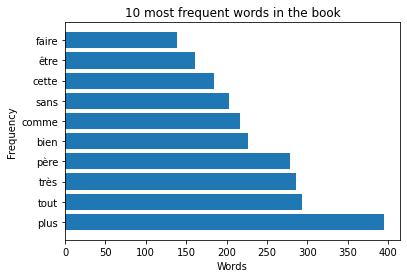

In [204]:
import matplotlib.pyplot as plt
plt.barh(words, counts)
plt.title("10 most frequent words in the book")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

In [195]:
# Step 10: Plot a wordcloud of the words filtered without stopwords

In [196]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [197]:
print(wordsFiltered)
print(words_join_no_stopwords)

['Théo', 'zelle', 'Huai', 'enseigne', 'filles', 'plus', 'accent', 'marseillais', 'elles', 'prononcent', '_des', 'oiegnons', 'Paul', 'Saint', 'Victor', 'taquine', 'ainsi', 'père', 'propos', 'institutrice', 'Mlle', 'Honorine', 'Huet', 'prononce', 'Huai', 'méchamment', 'sans', 'faire', 'sonner', 'imiter', 'parler', 'midi', 'antipathie', 'marquée', 'grave', 'personne', 'dirige', 'Quand', 'vient', 'maison', 'manque', 'jamais', 'décocher', 'haut', 'raide', 'faux', 'quelque', 'piquante', 'malice', 'Honorine', 'accueille', 'rire', 'gras', 'sonne', 'faux', 'minauderies', 'pincées', 'Toujours', 'aussi', 'grand', 'critique', 'arrêtait', 'comme', 'voyait', 'première', 'fois', 'devant', 'règlement_', 'Mlle', 'Huet', 'placardé', 'porte', 'disciplinait', 'chaque', 'heure', 'journée', 'affectait', 'grande', 'surprise', 'relisait', 'chaque', 'article', 'attention', 'narquoise', 'commentaires', 'ironiques', 'fois', 'rencontrées', 'quelques', 'jours', 'auparavant', 'matinée', 'Théâtre', 'Français', 'seul

Plotting of the words filtered without stopwords


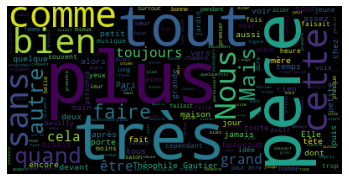

In [198]:
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

print(f'Plotting of the words filtered without stopwords')
draw = ' '.join([ w for w in wordsFiltered ])
cloud = WordCloud().generate(draw)
plt.imshow(cloud)
plt.axis('off')
plt.show()